In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Helper Functions

#### read fithichip loops files

In [2]:
def read_loop_files(file):
    loop_count = 0
    with open(file) as fr:
        loop_count = len(fr.readlines())
    return(loop_count)

In [3]:
# caller = 'fithichip' or 'hiccups'
# loop_type = 'chipseq.peaks', 'hichip-peaks.peaks', 'fithichip-peaks'
# config = 'L5', 'L10', 'L25', 'S5', 'S10', 'S25'
def get_loop_path(caller, loop_type, sample_name, config):
    path=''
    if caller == 'fithichip':
        if config[0] == 'L':
            path='results/loops/fithichip/{sn}_{lt}/{c}/FitHiChIP_Peak2ALL_b{c1}000_L20000_U2000000/P2PBckgr_0/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-{c}.interactions_FitHiC_Q0.01.bed'.format(sn = sample_name, lt = loop_type, c = config, c1 = config[1:])  
        if config[0] == 'S':
            path='results/loops/fithichip/{sn}_{lt}/{c}/FitHiChIP_Peak2ALL_b{c1}000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-{c}.interactions_FitHiC_Q0.01.bed'.format(sn = sample_name, lt = loop_type, c = config, c1 = config[1:])  
            
    if caller == 'hiccups':
            path = 'results/loops/hiccups/{sn}/postprocessed_pixels_{c}000.bedpe'.format(sn = sample_name, c = config)

    return(path) 

#### chipseq peak files

In [4]:
def read_peaks_files(file):
    peak_count = 0
    with open(file) as fr:
        peak_count = len(fr.readlines())
    return(peak_count)

In [5]:
def get_peaks_path(sample_name, peak_type):
    path=''
    samplesheet = 'results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv'
    with open(samplesheet) as fr:
        if peak_type == 'chipseq':
            for line in fr:
                if sample_name in line:
                    info = line.strip().split()
                    path = info[4]
        if peak_type == 'fithichip':
            for line in fr:
                if sample_name in line:
                    info = line.strip().split()
                    path = info[3]
        if peak_type == 'hichip_peaks':
            for line in fr:
                if sample_name in line:
                    info = line.strip().split()
                    path = info[2]
    return(path) 

#### generate pandas dataframe 

In [6]:
## hiccups

def generate_hi_df():
    data = []
    glob_str = glob.glob('results/hicpro/*Homo*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)
        
        ## HiCCUPS
        for config in ['5', '10', '25']:
            path = get_loop_path('hiccups', 'none', sample_name, config)
            
            if os.path.exists(path) and os.stat(path).st_size != 0:
                loop_info = read_loop_files(path)
                sample_info.append(loop_info - 2)
            else:
                sample_info.append(0)
     
        data.append(sample_info)
   
    hi_df = pd.DataFrame(data)
    return hi_df

In [7]:
## fithichip, chipseq peaks

def generate_fcs_df():
    data = []
    glob_str = glob.glob('results/hicpro/*Homo*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)
        
        ## Chip-seq peaks
        path = get_peaks_path(sample_name, 'chipseq')
        if os.path.exists(path):
            peak_info = read_peaks_files(path)
            sample_info.append(peak_info)
        else:
            sample_info.append('n/a')
            
        
        ## FitHiChIP Loops, chipseq
                
        for config in ["S5", "L5", "S10", "L10", "S25", "L25"]:
            path = get_loop_path('fithichip', 'chipseq.peaks', sample_name, config)
            
            if os.path.exists(path) and os.stat(path).st_size != 0:
                loop_info = read_loop_files(path)
                sample_info.append(loop_info - 1)
            else:
                sample_info.append(0)
        
        data.append(sample_info)
   
    fcs_df = pd.DataFrame(data)
    return fcs_df

In [8]:
## fithichip, hichip-peaks

def generate_hp_df():
    data = []
    glob_str = glob.glob('results/hicpro/*Homo*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)                
        
         ## HP peaks
        path = get_peaks_path(sample_name, 'hichip_peaks')
        if os.path.exists(path):
            peak_info = read_peaks_files(path)
            sample_info.append(peak_info)
        else:
            sample_info.append(0)
            
            
        ## FitHiChIP Loops, hichip-peaks
                
        for config in ["S5", "L5", "S10", "L10", "S25", "L25"]:
            path = get_loop_path('fithichip', 'hichip-peaks.peaks', sample_name, config)
            
            if os.path.exists(path) and os.stat(path).st_size != 0:
                loop_info = read_loop_files(path)
                sample_info.append(loop_info - 1)
            else:
                sample_info.append(0)
        
        data.append(sample_info)
   
    hp_df = pd.DataFrame(data)
    return hp_df

In [9]:
## fithichip, fithichip peaks

def generate_f_df():
    data = []
    glob_str = glob.glob('results/hicpro/*Homo*/')
    
    for fn in glob_str:
        sample_name = fn.strip().split('/')[2] 
        sample_info = []
        sample_info.append(sample_name)                
        
         ## Fithichip peaks
        path = get_peaks_path(sample_name, 'fithichip')
        if os.path.exists(path):
            peak_info = read_peaks_files(path)
            sample_info.append(peak_info)
        else:
            sample_info.append(0)
            
            
        ## FitHiChIP Loops, fithichip
                
        for config in ["S5", "L5", "S10", "L10", "S25", "L25"]:
            path = get_loop_path('fithichip', 'fithichip.peaks', sample_name, config)
            
            if os.path.exists(path) and os.stat(path).st_size != 0:
                loop_info = read_loop_files(path)
                sample_info.append(loop_info - 1)
            else:
                sample_info.append(0)
        
        data.append(sample_info)
   
    f_df = pd.DataFrame(data)
    return f_df

In [10]:
def generate_df(hi_df, fcs_df, hp_df, f_df):
    
    df = hi_df.merge(fcs_df)
    df = df.merge(hp_df)
    df = df.merge(f_df)
    return df

In [11]:
hi_df = generate_hi_df()

In [12]:
fcs_df = generate_fcs_df()

In [13]:
hp_df = generate_hp_df()

In [14]:
f_df = generate_f_df()

In [27]:
hi_df.columns = ['sample_name', "Hi.5", "Hi.10", "Hi.25"]
fcs_df.columns = ['sample_name', "CP", "FCP.S5", "FCP.L5", "FCP.S10", "FCP.L10", "FCP.S25", "FCP.L25"]
hp_df.columns = ['sample_name', "HPP", "FHPP.S5", "FHPP.L5", "FHPP.S10", "FHPP.L10", "FHPP.S25", "FHPP.L25"]
f_df.columns = ['sample_name', "F", "FF.S5", "FF.L5", "FF.S10", "FF.L10", "FF.S25", "FF.L25"]

hi_df = hi_df.sort_values(by='sample_name').reset_index(drop=True)
fcs_df = fcs_df.sort_values(by='sample_name').reset_index(drop=True)
hp_df = hp_df.sort_values(by='sample_name').reset_index(drop=True)
f_df = f_df.sort_values(by='sample_name').reset_index(drop=True)

df = generate_df(hi_df, fcs_df, hp_df, f_df)
df = df.sort_values(by='sample_name').reset_index(drop=True)
df

,sample_name,Hi.5,Hi.10,Hi.25,CP,FCP.S5,FCP.L5,FCP.S10,FCP.L10,FCP.S25,FCP.L25,HPP,FHPP.S5,FHPP.L5,FHPP.S10,FHPP.L10,FHPP.S25,FHPP.L25,F,FF.S5,FF.L5,FF.S10,FF.L10,FF.S25,FF.L25
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,0,0,0,19491,0,0,0,0,0,0,968,0,0,0,0,0,0,29430,0,0,0,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,0,0,0,21727,0,0,0,0,0,3,1801,0,0,0,0,2,2,73184,0,0,0,0,3,5
2,293T.GSE128106.Homo_Sapiens.YY1.b1,0,0,0,21267,0,0,0,0,0,0,43,0,0,0,0,238,2,987,0,0,0,0,0,0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,0,0,0,n/a,0,0,0,0,0,0,2661,31,349,412,2696,2533,9825,11489,47,346,776,3989,8323,24510
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,0,0,0,n/a,0,0,0,0,0,0,3468,6,80,123,994,1328,5859,10428,7,58,148,990,2518,9413
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,0,0,0,n/a,0,0,0,0,0,0,823,3,30,50,530,703,2944,7761,4,29,186,1111,4839,15127
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,0,0,0,n/a,0,0,0,0,0,0,2205,3,8,38,227,672,3195,23228,3,6,71,260,3720,9577
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,0,0,0,n/a,0,0,0,0,0,0,49,0,2,0,21,0,121,9018,3,4,39,94,2688,5674
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,0,0,0,n/a,0,0,0,0,0,0,46,0,2,0,6,0,61,27484,5,5,16,23,2398,4350
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,237,1174,2895,n/a,0,0,0,0,0,0,29585,3747,12292,10675,35490,25651,69659,60295,3514,11200,11313,34768,33321,79208


In [31]:
df_copy = df.copy(deep=True)

In [56]:
hi_df_copy = hi_df.copy(deep=True)
fcs_df_copy = fcs_df.copy(deep=True)
hp_df_copy = hp_df.copy(deep=True)
f_df_copy = f_df.copy(deep=True)

In [57]:
def set_status(row):
    if row['CP'] != 'n/a' and row['CP'] > 1000:
          return 1
    return 0

In [58]:
fcs_df_copy['Status'] = fcs_df_copy.apply(lambda row: set_status(row), axis=1)
fcs_df_copy = fcs_df_copy.loc[fcs_df_copy["Status"] == 1].reset_index(drop=True)
fcs_df_copy

,sample_name,CP,FCP.S5,FCP.L5,FCP.S10,FCP.L10,FCP.S25,FCP.L25,Status
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,19491,0,0,0,0,0,0,1
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,21727,0,0,0,0,0,3,1
2,293T.GSE128106.Homo_Sapiens.YY1.b1,21267,0,0,0,0,0,0,1
3,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779,12786,53896,28571,110387,64184,158929,1
4,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,13670,31,37,91,164,554,1343,1
5,BC3.GSE136090.Homo_Sapiens.H3K27ac.b1,12866,0,0,8,14,221,657,1
6,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,18843,519,1005,1129,3300,3293,10846,1
7,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,130219,40515,146863,75629,226532,133443,282327,1
8,COLO320-DM.GSE159985.Homo_Sapiens.H3K27ac.b1,15865,18375,21276,10720,13459,3345,9615,1
9,CTL.GSE117888.Homo_Sapiens.H3K27ac.b1,153727,1,1,1,1,3,3,1


In [138]:
fcs_df_copy.describe()

,FCP.S5,FCP.L5,FCP.S10,FCP.L10,FCP.S25,FCP.L25,Status
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,14071.949495,41937.272727,19529.616162,56345.212121,35503.777778,76983.030303,1.0
std,28846.009617,70931.322614,39325.498396,86242.311834,56792.427089,92012.149035,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,51.000000,85.000000,970.000000,2107.500000,6024.000000,12843.500000,1.0
50%,1399.000000,3329.000000,4270.000000,12943.000000,16565.000000,46375.000000,1.0
75%,14932.000000,56111.500000,18274.500000,80403.000000,37478.500000,97720.500000,1.0
max,158091.000000,366779.000000,224772.000000,374924.000000,360056.000000,452160.000000,1.0


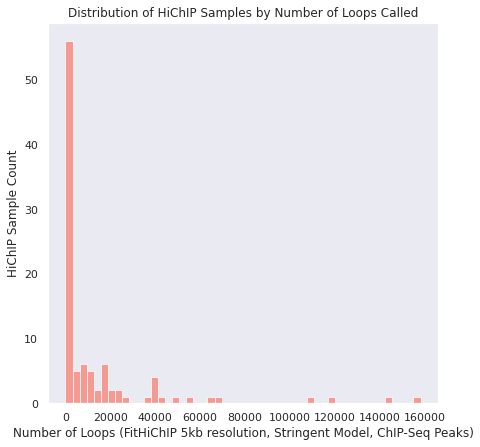

In [137]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x="FCP.S5", data=fcs_df_copy, bins=50)
ax.set(xlabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model, ChIP-Seq Peaks)', ylabel='HiChIP Sample Count', title='Distribution of HiChIP Samples by Number of Loops Called')
fig = ax.get_figure()
#fig.savefig('dist-num-loops-25kb.png', dpi=300) 

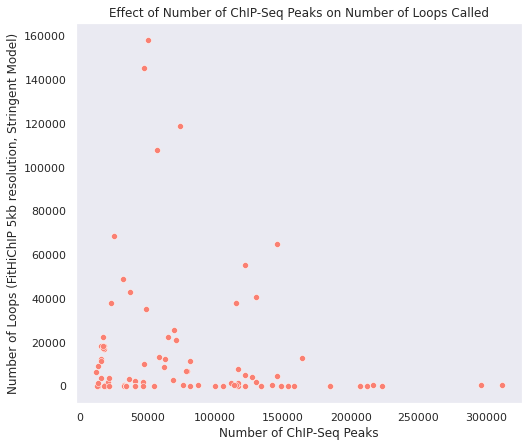

In [130]:
sns.set(rc = {'figure.figsize':(8,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.scatterplot(x="CP",y="FCP.S5", data=fcs_df_copy)
ax.set(ylabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model)', xlabel='Number of ChIP-Seq Peaks', title='Effect of Number of ChIP-Seq Peaks on Number of Loops Called')
fig = ax.get_figure()
fig.savefig('dist-loops-peaks.png', dpi=300) 

In [103]:
def read_hicpro_stats_log(log):
    log_data = 'check'
    with open(log) as fr:
        for line in fr:
            if line.strip().split()[0] == 'valid_interaction':
                info = line.strip().split()
                log_data = int(info[1])
    return(log_data)

In [111]:
mRSstat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}_allValidPairs.mergestat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    data = []
    std_sample_name = fn.split('/')[2]
    data.append(std_sample_name)
    mRSstat = read_hicpro_stats_log(fn)
    data.append(mRSstat)
    mRSstat_data.append(data)
mRSstat_df = pd.DataFrame(mRSstat_data)
columns = ['sample_name', 'valid_pairs']
mRSstat_df.columns = columns

In [120]:
fcs_df_copy_1 = fcs_df_copy.copy(deep=True)
fcs_df_copy_1 = fcs_df_copy_1.merge(mRSstat_df)

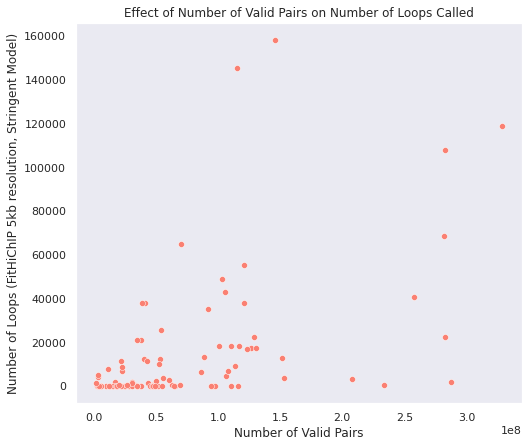

In [129]:
sns.set(rc = {'figure.figsize':(8,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.scatterplot(x="valid_pairs",y="FCP.S5", data=fcs_df_copy_1)
ax.set(ylabel='Number of Loops (FitHiChIP 5kb resolution, Stringent Model)', xlabel='Number of Valid Pairs', title='Effect of Number of Valid Pairs on Number of Loops Called')
fig = ax.get_figure()
fig.savefig('dist-loops-validpairs.png', dpi=300) 

In [145]:
def read_loop_files_dist(file):
    loops_dists = []
    with open(file) as fr:
        next(fr)
        for line in fr:
            info = line.strip().split()
            loops_dists.append(int(info[4]) - int(info[1]))
    return loops_dists

In [149]:
file = '/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/fithichip/Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1_chipseq.peaks/S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP-S5.interactions_FitHiC_Q0.01.bed'
dists = read_loop_files_dist(file)

In [152]:
dists_df = pd.DataFrame(dists)
dists_df.describe()

,0
count,1.278600e+04
mean,2.185891e+05
std,2.136933e+05
min,2.000000e+04
25%,8.500000e+04
50%,1.500000e+05
75%,2.800000e+05
max,1.990000e+06


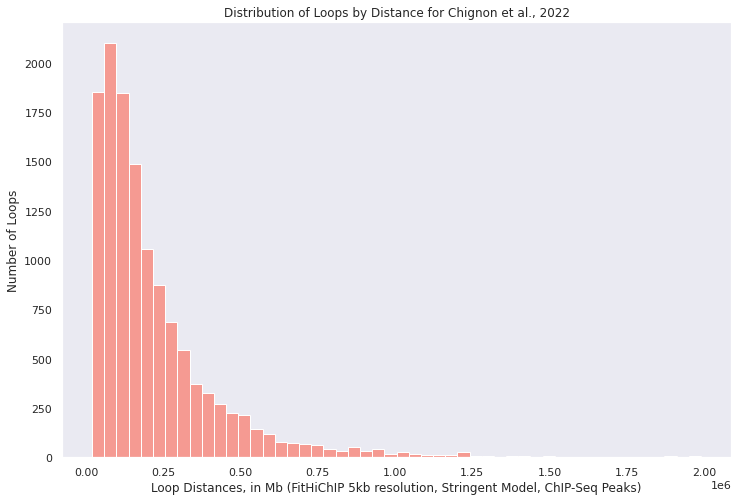

In [160]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x=0, data=dists_df, bins=50)
ax.set(xlabel='Loop Distances, in Mb (FitHiChIP 5kb resolution, Stringent Model, ChIP-Seq Peaks)', ylabel='Number of Loops', title='Distribution of Loops by Distance for Chignon et al., 2022')
fig = ax.get_figure()
fig.savefig('dist-loops-dist-5kb.png', dpi=300) 